_hds5210 Programming for Health Data Scientists_

# Week 11 - Assignment

This week's assignment is an extended examination of the trade offs between spending time pre-sorting data and how many times the data needs to be searched.  Sometimes it isn't worth it, sometimes it is.  Let's figure out which times are which?


## Step 1 - Setup Pre-Sorted Binary Search

Write a function that takes a list (L) and a number of times to search through it (N), and executes the following instructions:

1. Sort L using built-in list sort
2. Loop through N times:
  * Generate a random number between the min and max values in L
  * Use the _bisect_ module's built-in search for the random number

In [6]:
import random
import bisect
def binary_search(L, N):
    L.sort()
    for i in range(N):
        r = random.randrange(L[0], L[-1])
        bisect.bisect(L, r)

## Step 2 - Setup Linear Search

Write a functiona that takes a list (L) and a number of times to search through it (N), and executes teh following instructions:

1. Compute the min and max of L
2. Loop through N times:
  * Generate a random number between min and max values of L
  * Use the list index() method to find the randome number

In [7]:
import random
def linear_search(L, N):
    minimum = min(L)
    maximum = max(L)
    for i in range(N):
        r = random.randrange(minimum, maximum)
        r in L

## Step 3 - Run the timings

Use the _time_ module to run timings with the random list being generated below.

Run timings of both pre-sorted binary search and linear search for the list below and create a list with entries that each contain the values of (N, binary-time, linear-time) for the following values of N:
* 1
* 2
* 3
* 4
* 5
* 6
* 7
* 8
* 9
* 10
* 20
* 30
* 40
* 50
* 100



In [20]:
import time
import random

size = 1000
x = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,100]
y_binary = []
y_linear = []

print("{:>10s} : {:>15s} : {:>15s}".format("N", "Binary", "Linear"))

for n in x:
    L = []
    for i in range(size):
        L.append(random.randrange(0,size))

    start = time.perf_counter()
    binary_search(L, n)
    end = time.perf_counter()
    binary_time = (end - start)*1000
    
    start = time.perf_counter()
    linear_search(L, n)
    end = time.perf_counter()
    linear_time = (end - start)*1000
    
    print("{:10d} : {:15.2f} : {:15.2f}".format(n, binary_time, linear_time))
    y_binary.append(binary_time)
    y_linear.append(linear_time)



         N :          Binary :          Linear
         1 :            0.39 :            0.08
         2 :            0.37 :            0.09
         3 :            0.36 :            0.16
         4 :            0.36 :            0.14
         5 :            0.37 :            0.19
         6 :            0.39 :            0.20
         7 :            0.37 :            0.23
         8 :            0.37 :            0.22
         9 :            0.37 :            0.28
        10 :            0.38 :            0.30
        20 :            0.41 :            0.54
        30 :            0.43 :            0.79
        40 :            0.46 :            1.11
        50 :            0.48 :            1.13
       100 :            0.59 :            2.46


## Step 4 - Compare timings

Looking at those timings above, at about what point does it become more efficient to take the time to pre-sort your data.  Describe the circumstances under which you would and would not want to pre-sort the data you're going to be searching through.


<IPython.core.display.Javascript object>


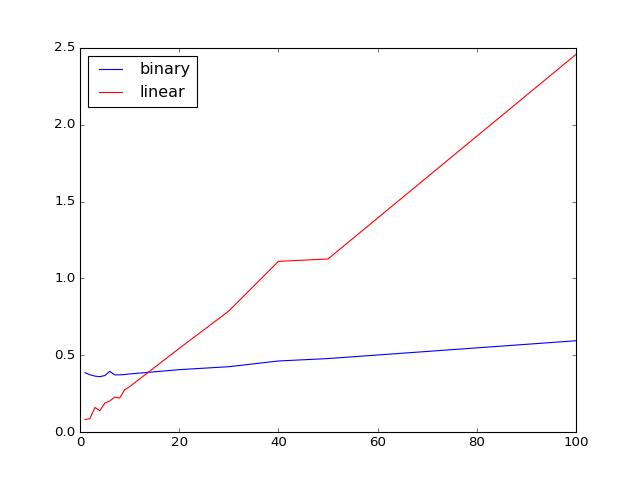

In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(x, y_binary, c='b', label='binary')
ax1.plot(x, y_linear, c='r', label='linear')
plt.legend(loc='upper left');
plt.show()
